In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Fill in missing values in the 2013-2019_Counties_Data.xlxs file with linear interpolation method.

# Specify the Excel file path
excel_file_path = './2013-2019_Counties_Data.xlsx'

# Specify the list of column names for interpolation
columns_to_interpolate = ['Gross regional product (ten thousand yuan)', 'Administrative area (sq. km)',
                          'Landline subscribers (households)', 'Primary Industry Added Value (in ten thousand yuan)',
                          'Secondary Industry Added Value (in ten thousand yuan)',
                          "Residents' Savings Deposit Balance (in ten thousand yuan)",
                          'Year-End Financial Institutions Total Loan Balance (in ten thousand yuan)',
                          'Number of industrial enterprises above designated size (units)',
                          'Number of Hospital Beds in Medical Health Institutions(units)',
                          'Number of Various Social Welfare Adoption Institutions(units)',
                          'Tertiary Industry Employees (people)',
                          'Number of Students in Secondary Vocational Education Schools (people)']


# Read Excel file
df = pd.read_excel(excel_file_path)

# Iterate through the list of column names and process each column
for column_name in columns_to_interpolate:
    
    # Check if the column exists
    if column_name in df.columns:
       
        # Perform linear interpolation on the specified column
        df[column_name] = df[column_name].interpolate(method='linear')

     
        # Round the interpolation results and convert them to integers
        df[column_name] = df[column_name].round().astype(int)

      
        # Output the completed column information
        print(f"Interpolation and rounding completed for column: {column_name}")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

# Save the modified DataFrame to a new Excel file, automatically overwrite if the file already exists
output_file_path = './fill_missing_step1.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Completed. The output is saved to {output_file_path}")

Interpolation and rounding completed for column: Gross regional product (ten thousand yuan)
Interpolation and rounding completed for column: Administrative area (sq. km)
Interpolation and rounding completed for column: Landline subscribers (households)
Interpolation and rounding completed for column: Primary Industry Added Value (in ten thousand yuan)
Interpolation and rounding completed for column: Secondary Industry Added Value (in ten thousand yuan)
Interpolation and rounding completed for column: Residents' Savings Deposit Balance (in ten thousand yuan)
Interpolation and rounding completed for column: Year-End Financial Institutions Total Loan Balance (in ten thousand yuan)
Interpolation and rounding completed for column: Number of industrial enterprises above designated size (units)
Interpolation and rounding completed for column: Number of Hospital Beds in Medical Health Institutions(units)
Interpolation and rounding completed for column: Number of Various Social Welfare Adoption

In [4]:
# Step2: Performing division operations on some specific two columns and inserting the resulting new column into the Excel file

# Specify the Excel file path
excel_file_path = './fill_missing_step1.xlsx'

# 定义需要进行操作的列对及其结果列名称
# 格式：(被除数列名, 除数列名, 结果列名)
# Define the column pairs to operate on and their resulting column names
# Format: (dividend column name, divisor column name, result column name)
columns_operations = [
    ('Registered Population (in ten thousands)', 'Administrative area (sq. km)', 'Population density (people per square kilometer)'),
    ('Landline subscribers (households)', 'Registered Population (in ten thousands)', 'Telecommunication coverage level (households per ten thousand people)'),
    ('Number of Students in Secondary Vocational Education Schools (people)', 'Registered Population (in ten thousands)', 'Human capital level (people per 10,000 people)'),
    ('Primary Industry Added Value (in ten thousand yuan)', 'Registered Population (in ten thousands)', 'Agricultural development level (yuan per person)'),
    ("Residents' Savings Deposit Balance (in ten thousand yuan)", 'Registered Population (in ten thousands)', 'Resident savings level (yuan per person)'),
    ('Year-End Financial Institutions Total Loan Balance (in ten thousand yuan)', 'Registered Population (in ten thousands)', 'Financial development level (yuan per person)')
    # 可以根据需要继续添加更多的列对
]

# specific columns
specific_column = 'Population density (people per square kilometer)'

# Read Excel file
df = pd.read_excel(excel_file_path)

# Iterate through each column pair for operation
for column_to_divide, column_divisor, new_column_name in columns_operations:

    # Ensure both columns exist
    if column_to_divide in df.columns and column_divisor in df.columns:

        # Perform division operation when the divisor is not zero
        df[new_column_name] = df[column_to_divide].div(df[column_divisor].replace(0, pd.NA))
    
        # If it's a specific column, multiply its value by 10000
        if new_column_name == specific_column:
            df[new_column_name] = df[new_column_name] * 10000
            
        # Round the results and convert them to integers
        df[new_column_name] = df[new_column_name].round().astype(int)
        # Output the information
        print(f"Interpolation and rounding completed for column: {new_column_name}")
    else:
        print(f"One or both columns '{column_to_divide}' and '{column_divisor}' do not exist in the DataFrame.")

# Save the modified DataFrame to a new Excel file.
output_file_path = './updated_step2.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Completed. The output is saved to {output_file_path}")

Interpolation and rounding completed for column: Population density (people per square kilometer)
Interpolation and rounding completed for column: Telecommunication coverage level (households per ten thousand people)
Interpolation and rounding completed for column: Human capital level (people per 10,000 people)
Interpolation and rounding completed for column: Agricultural development level (yuan per person)
Interpolation and rounding completed for column: Resident savings level (yuan per person)
Interpolation and rounding completed for column: Financial development level (yuan per person)
Completed. The output is saved to ./updated_step2.xlsx


In [30]:
# Step 3: Remove the columns used as dividend and divisor in step two from the table, and rename specific column names

# Specific the Excel file path
excel_file_path = './updated_step2.xlsx'

# Define the list of column names to be deleted
columns_to_delete = ['Landline subscribers (households)',
                     "Residents' Savings Deposit Balance (in ten thousand yuan)",
                     'Year-End Financial Institutions Total Loan Balance (in ten thousand yuan)',
                     'Number of Students in Secondary Vocational Education Schools (people)',
                     'Registered Population (in ten thousands)']

# Define a dictionary of column names to be renamed {original column name: new column name}
columns_to_rename = {'Administrative area (sq. km)': 'Geographical area(sq. km)',
                     'Number of industrial enterprises above designated size (units)': 'Level of Industrial Scale(units)',
                     'Number of Hospital Beds in Medical Health Institutions(units)': 'Healthcare Level(beds)',
                     'Number of Various Social Welfare Adoption Institutions(units)': 'Welfare Facilities Level(units)'}

# Read Excel file 
df = pd.read_excel(excel_file_path)

# Iterate through and rename specific columns
for old_name, new_name in columns_to_rename.items():
    if old_name in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)
        print(f"Renamed column: {old_name} to {new_name}")
    else:
        print(f"Column to rename not found: {old_name}")

# Iterate through and delete columns
for column in columns_to_delete:
    if column in df.columns:
        df.drop(columns=[column], inplace=True)
        print(f"Deleted column: {column}")
    else:
        print(f"Column not found: {column}")

# Save the modified DataFrame to a new Excel file
output_file_path = './clean_columns_step3.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Completed. The modified file is saved to {output_file_path}")


Renamed column: Administrative area (sq. km) to Geographical area(sq. km)
Renamed column: Number of industrial enterprises above designated size (units) to Level of Industrial Scale(units)
Renamed column: Number of Hospital Beds in Medical Health Institutions(units) to Healthcare Level(beds)
Renamed column: Number of Various Social Welfare Adoption Institutions(units) to Welfare Facilities Level(units)
Deleted column: Landline subscribers (households)
Deleted column: Residents' Savings Deposit Balance (in ten thousand yuan)
Deleted column: Year-End Financial Institutions Total Loan Balance (in ten thousand yuan)
Deleted column: Number of Students in Secondary Vocational Education Schools (people)
Deleted column: Registered Population (in ten thousands)
Completed. The modified file is saved to ./clean_columns_step3.xlsx


In [3]:
# Step 4: Correlation analysis

# Specify the Excel file path
excel_file_path = './clean_columns_step3.xlsx'

# Read Excel file
df = pd.read_excel(excel_file_path)
#print(df)

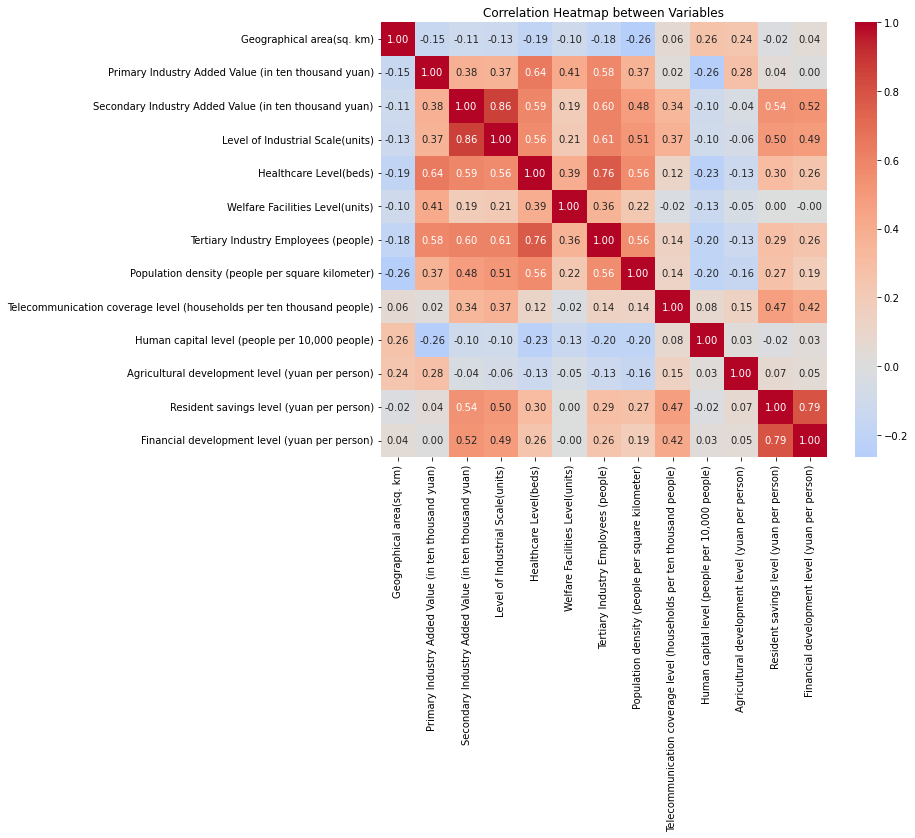

In [4]:
# Remove the first three Columns (Year/County/Gross regional product)
X_variables = df.columns[3:]

# Calculate the correlation coefficient matrix among variables
correlation_matrix = df[X_variables].corr()

# Create a heatmap of correlation coefficients
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Heatmap between Variables')
plt.show()

# Analysis: The range of the correlation coefficient is [-1, 1]. The closer this value is to -1 or 1, the stronger the correlation between two variables.
# Some variables have high correlarions:
# Level of industrial scale & secondary industry added value (0.86)
# Resident savings level & Financial development level (0.79)
# Healthcare level & Tertiary industry Empolyee (0.76)
# Tertiary Industry Employees & Level of industrial scale (0.61)
# Tertiary Industry Employees & Secondary industry added value (0.60)


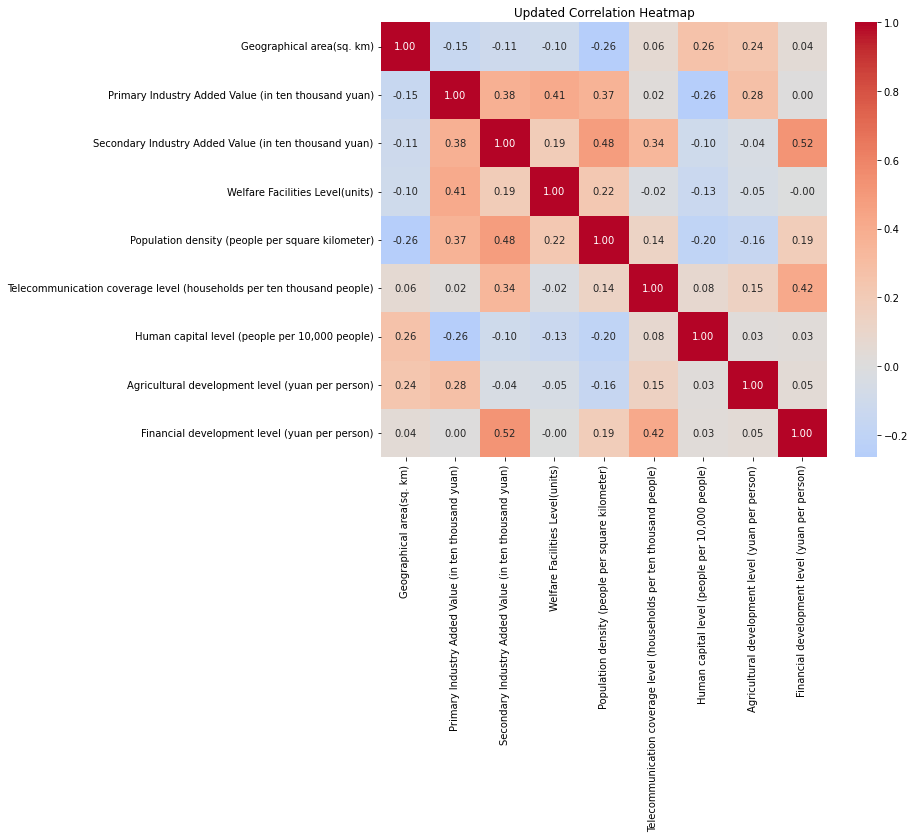

In [60]:
# Based on the results of heatmap, remove variables that have high correlation with each other.
X_vars_updated = [var for var in X_variables if var not in [
    'Level of Industrial Scale(units)',
    'Resident savings level (yuan per person)',
    'Healthcare Level(beds)',
    'Tertiary Industry Employees (people)'
]]

# Recompute the correlation coefficient matrix using the updated list of variables.
corr_matrix_updated = df[X_vars_updated].corr()

# Establish new heatmap with updated X_variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_updated, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Updated Correlation Heatmap')
plt.show()

In [62]:
#  Define the list with high correlation
columns_to_delete2 = ['Level of Industrial Scale(units)',
                     'Resident savings level (yuan per person)',
                     'Healthcare Level(beds)',
                     'Tertiary Industry Employees (people)']

# Iterate through and delete columns
for column in columns_to_delete2:
    if column in df.columns:
        df.drop(columns=[column], inplace=True)
        print(f"Deleted column: {column}")
    else:
        print(f"Column not found: {column}")

# Save the modified DataFrame to a new Excel file
output_file_path = './corr_columns_step4.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Completed. The modified file is saved to {output_file_path}")

Column not found: Level of Industrial Scale(units)
Column not found: Resident savings level (yuan per person)
Column not found: Healthcare Level(beds)
Column not found: Tertiary Industry Employees (people)
Completed. The modified file is saved to ./corr_columns_step4.xlsx


In [64]:
# Step 5: linear regression model (Panel data)

# Specify the Excel file path
excel_file_path5 = './corr_columns_step4.xlsx'

# Read Excel file
panel_data = pd.read_excel(excel_file_path5)

# Define X and Y in the linear regression model
X = panel_data[['Geographical area(sq. km)',
                'Primary Industry Added Value (in ten thousand yuan)',
                'Secondary Industry Added Value (in ten thousand yuan)',
                'Welfare Facilities Level(units)',
                'Population density (people per square kilometer)',
                'Telecommunication coverage level (households per ten thousand people)',
                'Human capital level (people per 10,000 people)',
                'Agricultural development level (yuan per person)',
                'Financial development level (yuan per person)'
]]
y = panel_data['Gross regional product (ten thousand yuan)']

# Add an intercept term
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y,X)
results = model.fit()

# Print the output
print(results.summary())


                                        OLS Regression Results                                        
Dep. Variable:     Gross regional product (ten thousand yuan)   R-squared:                       0.971
Model:                                                    OLS   Adj. R-squared:                  0.971
Method:                                         Least Squares   F-statistic:                 5.015e+04
Date:                                        Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                                                17:51:40   Log-Likelihood:            -1.9446e+05
No. Observations:                                       13461   AIC:                         3.889e+05
Df Residuals:                                           13451   BIC:                         3.890e+05
Df Model:                                                   9                                         
Covariance Type:                                    nonrobust            

In [68]:
# Step 6: Choose important variables and create new index as “Rural Economic Index”
# Use PCA to create the Index

# Accirding to the results from linear regression, we thought below variables have strong influence on Gross regional product (95%):
# Primary Industry Added Value
# Secondary Industry Added Value
# Population desity 
# Agricultural development level
# Financial development level
# We will use these variables to create "REI = Rural Economic Index" 

data = panel_data[['Primary Industry Added Value (in ten thousand yuan)',
                'Secondary Industry Added Value (in ten thousand yuan)',
                'Population density (people per square kilometer)',
                'Agricultural development level (yuan per person)',
                'Financial development level (yuan per person)'
]]  

pca = PCA(n_components=1) # Select one principal component

# Standardize the selected variables
scaler=StandardScaler()
scaled_data = scaler.fit_transform(data)

# Fit a PCA(Principal Component Analysis) model with the standarized data
pca.fit(scaled_data)

# Obtain the eigenvectors and eigenvalues.
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

# Generate "Rural Economic Index"
Rural_Economic_Index = pca.transform(data)

# Create new DataFrame (including REI)
result_df = panel_data[['Year','County']].copy()
result_df['Rural Economic Index (REI)']= Rural_Economic_Index[:,0]

# Output into Excel file
output_file_path = './rural_economic_index_step6.xlsx'
result_df.to_excel(output_file_path, index=False)
print(f"Completed. The modified file is saved to {output_file_path}")


C:\Users\Jiarui_Zhu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Completed. The modified file is saved to ./rural_economic_index_step6.xlsx
